# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import geopandas as gpd
import requests
import geoviews as gv
from geoviews import tile_sources as gv
#import cartopy.crs as ccrs


# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_df.head()

City_ID               City      Lat       Lng  Max Temp  Humidity  \
0        0         hood river  45.7054 -121.5215     14.89        61   
1        1  port-aux-francais -49.3500   70.2167      6.69        98   
2        2            torghay  49.6339   63.4981     21.34        34   
3        3  port saint john's -31.6229   29.5448     13.64        78   
4        4               ta`u -14.2336 -169.5144     27.42        81   

   Cloudiness  Wind Speed Country        Date  
0         100        3.13      US  1684812953  
1          97       13.41      TF  1684812953  
2           1        5.89      KZ  1684812953  
3          72        3.26      ZA  1684812953  
4          10        6.08      AS  1684812954

In [3]:
city_df.columns


Index(['City_ID', 'City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

In [4]:
# Configure the map plot
#df = pd.DataFrame(city_data_df)
map_plot = city_df.hvplot.points(
    "Lng", 
    "Lat", 
    geo = True, 
    size = "Humidity",
    scale = 1,
    color = "City",
    alpha = 0.5,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500
)

# Display the map
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Humidity)

### Step 2: Narrow down the `city_df` DataFrame to find your ideal weather condition, A max temperature higher than 15 degrees but lower than 30 degrees, Wind speed less than 4.5 m/s and, Zero cloudiness

In [5]:
# Narrow down cities that fit criteria and drop any results with null values
# Filter the DataFrame based on ideal weather conditions
ideal_conditions = (city_df['Max Temp'] > 15) & (city_df['Max Temp'] < 30) & (city_df['Wind Speed'] < 4.5) & (city_df['Cloudiness'] == 0)
ideal_cities = city_df[ideal_conditions]

# Print the filtered DataFrame
ideal_cities


City_ID             City      Lat       Lng  Max Temp  Humidity  \
16        16   hassi messaoud  31.6804    6.0729     19.92        19   
24        24   port macquarie -31.4333  152.9167     21.05        31   
40        40          ballina -28.8667  153.5667     22.10        53   
60        60       orangeburg  33.4918  -80.8557     18.91        90   
83        83         hamilton  39.1834  -84.5333     19.47        68   
89        89     san patricio  28.0170  -97.5169     26.92        83   
92        92       woolgoolga -30.1106  153.2007     21.13        35   
105      105          gereida  11.2811   25.1414     27.83        14   
129      129          lincoln  40.8000  -96.6670     20.19        66   
145      145    bahia de kino  28.8333 -111.9333     26.62        49   
174      174          awjilah  29.1081   21.2869     18.45        55   
178      178     mersa matruh  31.3525   27.2453     16.11        88   
225      225           newman  37.3138 -121.0208     29.13        42   
231      231             suez  29.9737   32.5263     20.61        62   
246      246     saint-pierre -21.3393   55.4781     22.82        64   
256      256      tamanrasset  22.7850    5.5228     17.95        11   
262      262        ketchikan  55.3422 -131.6461     16.26        41   
303      303    alice springs -23.7000  133.8833     17.75        34   
313      313        rovaniemi  66.5000   25.7167     15.67        55   
336      336  pereira barreto -20.6383  -51.1092     17.13        56   
372      372       siwa oasis  29.2041   25.5195     21.85        41   
393      393          biloela -24.4167  150.5000     25.42        26   
409      409     christchurch -43.5333  172.6333     15.26        73   
439      439   nizhnevartovsk  60.9344   76.5531     17.01        31   
445      445    redwood falls  44.5394  -95.1169     23.01        49   
463      463          motueka -41.1333  173.0167     17.83        75   
479      479            dubbo -32.2500  148.6167     19.07        30   
500      500      al burayqah  30.4062   19.5739     19.30        75   
514      514   saint-philippe -21.3585   55.7679     22.77        69   
532      532           dryden  49.7833  -92.7503     17.16        59   
538      538            tokar  18.4254   37.7290     28.16        70   
539      539      goondiwindi -28.5500  150.3167     20.89        26   
554      554           medina  24.4686   39.6142     25.24        22   

     Cloudiness  Wind Speed Country        Date  
16            0        0.00      DZ  1684812958  
24            0        2.09      AU  1684812960  
40            0        2.57      AU  1684812964  
60            0        0.00      US  1684812997  
83            0        3.09      US  1684812863  
89            0        3.24      US  1684813003  
92            0        1.69      AU  1684813003  
105           0        3.43      SD  1684813006  
129           0        1.34      US  1684812672  
145           0        3.45      MX  1684813014  
174           0        1.96      LY  1684813021  
178           0        2.06      EG  1684813022  
225           0        2.03      US  1684813035  
231           0        1.47      EG  1684813036  
246           0        3.60      RE  1684813041  
256           0        2.06      DZ  1684813044  
262           0        3.60      US  1684813045  
303           0        4.12      AU  1684813054  
313           0        3.60      FI  1684813056  
336           0        3.32      BR  1684813061  
372           0        2.37      EG  1684813068  
393           0        2.85      AU  1684813073  
409           0        3.60      NZ  1684813076  
439           0        4.00      RU  1684813085  
445           0        3.60      US  1684813086  
463           0        1.69      NZ  1684813090  
479           0        2.06      AU  1684813095  
500           0        0.67      LY  1684813100  
514           0        0.71      RE  1684813104  
532           0        1.03      CA  1684813108  
538   

In [6]:
# Drop any rows with null values
city_df = city_df.dropna()

# Filter the DataFrame based on ideal weather conditions
ideal_conditions = (city_df['Max Temp'] > 15) & (city_df['Max Temp'] < 30) & (city_df['Wind Speed'] < 4.5) & (city_df['Cloudiness'] == 0)
ideal_cities = city_df[ideal_conditions]

# Print the filtered DataFrame
ideal_cities

City_ID             City      Lat       Lng  Max Temp  Humidity  \
16        16   hassi messaoud  31.6804    6.0729     19.92        19   
24        24   port macquarie -31.4333  152.9167     21.05        31   
40        40          ballina -28.8667  153.5667     22.10        53   
60        60       orangeburg  33.4918  -80.8557     18.91        90   
83        83         hamilton  39.1834  -84.5333     19.47        68   
89        89     san patricio  28.0170  -97.5169     26.92        83   
92        92       woolgoolga -30.1106  153.2007     21.13        35   
105      105          gereida  11.2811   25.1414     27.83        14   
129      129          lincoln  40.8000  -96.6670     20.19        66   
145      145    bahia de kino  28.8333 -111.9333     26.62        49   
174      174          awjilah  29.1081   21.2869     18.45        55   
178      178     mersa matruh  31.3525   27.2453     16.11        88   
225      225           newman  37.3138 -121.0208     29.13        42   
231      231             suez  29.9737   32.5263     20.61        62   
246      246     saint-pierre -21.3393   55.4781     22.82        64   
256      256      tamanrasset  22.7850    5.5228     17.95        11   
262      262        ketchikan  55.3422 -131.6461     16.26        41   
303      303    alice springs -23.7000  133.8833     17.75        34   
313      313        rovaniemi  66.5000   25.7167     15.67        55   
336      336  pereira barreto -20.6383  -51.1092     17.13        56   
372      372       siwa oasis  29.2041   25.5195     21.85        41   
393      393          biloela -24.4167  150.5000     25.42        26   
409      409     christchurch -43.5333  172.6333     15.26        73   
439      439   nizhnevartovsk  60.9344   76.5531     17.01        31   
445      445    redwood falls  44.5394  -95.1169     23.01        49   
463      463          motueka -41.1333  173.0167     17.83        75   
479      479            dubbo -32.2500  148.6167     19.07        30   
500      500      al burayqah  30.4062   19.5739     19.30        75   
514      514   saint-philippe -21.3585   55.7679     22.77        69   
532      532           dryden  49.7833  -92.7503     17.16        59   
538      538            tokar  18.4254   37.7290     28.16        70   
539      539      goondiwindi -28.5500  150.3167     20.89        26   
554      554           medina  24.4686   39.6142     25.24        22   

     Cloudiness  Wind Speed Country        Date  
16            0        0.00      DZ  1684812958  
24            0        2.09      AU  1684812960  
40            0        2.57      AU  1684812964  
60            0        0.00      US  1684812997  
83            0        3.09      US  1684812863  
89            0        3.24      US  1684813003  
92            0        1.69      AU  1684813003  
105           0        3.43      SD  1684813006  
129           0        1.34      US  1684812672  
145           0        3.45      MX  1684813014  
174           0        1.96      LY  1684813021  
178           0        2.06      EG  1684813022  
225           0        2.03      US  1684813035  
231           0        1.47      EG  1684813036  
246           0        3.60      RE  1684813041  
256           0        2.06      DZ  1684813044  
262           0        3.60      US  1684813045  
303           0        4.12      AU  1684813054  
313           0        3.60      FI  1684813056  
336           0        3.32      BR  1684813061  
372           0        2.37      EG  1684813068  
393           0        2.85      AU  1684813073  
409           0        3.60      NZ  1684813076  
439           0        4.00      RU  1684813085  
445           0        3.60      US  1684813086  
463           0        1.69      NZ  1684813090  
479           0        2.06      AU  1684813095  
500           0        0.67      LY  1684813100  
514           0        0.71      RE  1684813104  
532           0        1.03      CA  1684813108  
538   

### Step 3: Create a new DataFrame called `hotel_df`.

In [7]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
# Create a copy of the ideal_cities DataFrame
hotel_df = ideal_cities[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()

# Print the hotel_df DataFrame
print(hotel_df)



                City Country      Lat       Lng  Humidity
16    hassi messaoud      DZ  31.6804    6.0729        19
24    port macquarie      AU -31.4333  152.9167        31
40           ballina      AU -28.8667  153.5667        53
60        orangeburg      US  33.4918  -80.8557        90
83          hamilton      US  39.1834  -84.5333        68
89      san patricio      US  28.0170  -97.5169        83
92        woolgoolga      AU -30.1106  153.2007        35
105          gereida      SD  11.2811   25.1414        14
129          lincoln      US  40.8000  -96.6670        66
145    bahia de kino      MX  28.8333 -111.9333        49
174          awjilah      LY  29.1081   21.2869        55
178     mersa matruh      EG  31.3525   27.2453        88
225           newman      US  37.3138 -121.0208        42
231             suez      EG  29.9737   32.5263        62
246     saint-pierre      RE -21.3393   55.4781        64
256      tamanrasset      DZ  22.7850    5.5228        11
262        ket

In [8]:

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name'] = ''

# Display sample data
hotel_df

City Country      Lat       Lng  Humidity Hotel Name
16    hassi messaoud      DZ  31.6804    6.0729        19           
24    port macquarie      AU -31.4333  152.9167        31           
40           ballina      AU -28.8667  153.5667        53           
60        orangeburg      US  33.4918  -80.8557        90           
83          hamilton      US  39.1834  -84.5333        68           
89      san patricio      US  28.0170  -97.5169        83           
92        woolgoolga      AU -30.1106  153.2007        35           
105          gereida      SD  11.2811   25.1414        14           
129          lincoln      US  40.8000  -96.6670        66           
145    bahia de kino      MX  28.8333 -111.9333        49           
174          awjilah      LY  29.1081   21.2869        55           
178     mersa matruh      EG  31.3525   27.2453        88           
225           newman      US  37.3138 -121.0208        42           
231             suez      EG  29.9737   32.5263        62           
246     saint-pierre      RE -21.3393   55.4781        64           
256      tamanrasset      DZ  22.7850    5.5228        11           
262        ketchikan      US  55.3422 -131.6461        41           
303    alice springs      AU -23.7000  133.8833        34           
313        rovaniemi      FI  66.5000   25.7167        55           
336  pereira barreto      BR -20.6383  -51.1092        56           
372       siwa oasis      EG  29.2041   25.5195        41           
393          biloela      AU -24.4167  150.5000        26           
409     christchurch      NZ -43.5333  172.6333        73           
439   nizhnevartovsk      RU  60.9344   76.5531        31           
445    redwood falls      US  44.5394  -95.1169        49           
463          motueka      NZ -41.1333  173.0167        75           
479            dubbo      AU -32.2500  148.6167        30           
500      al burayqah      LY  30.4062   19.5739        75           
514   saint-philippe      RE -21.3585   55.7679        69           
532           dryden      CA  49.7833  -92.7503        59           
538            tokar      SD  18.4254   37.7290        70           
539      goondiwindi      AU -28.5500  150.3167        26           
554           medina      SA  24.4686   39.6142        22

### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [9]:
# Set parameters to search for a hotel
radius = 10000
params = {
    "type": "hotel",
    "limit": 1,
    "apiKey": "YOUR_API_KEY"  # Replace with your Geoapify API key
}

# Print a message to follow up the hotel search
print("Searching for hotels within 10,000 meters...")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # Get latitude, longitude from the DataFrame
    lat = row['Lat']
    lng = row['Lng']
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{radius}@{lng},{lat}"
    params["bias"] = f"proximity:{lng},{lat}"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"
    
    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params).json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = response["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
    
    # Log the search results
    print(f"Processed {index + 1} of {len(hotel_df)} | Hotel: {hotel_df.loc[index, 'Hotel Name']}")
  
# Display sample data
print(hotel_df)



Searching for hotels within 10,000 meters...
Processed 17 of 33 | Hotel: No hotel found
Processed 25 of 33 | Hotel: No hotel found
Processed 41 of 33 | Hotel: No hotel found
Processed 61 of 33 | Hotel: No hotel found
Processed 84 of 33 | Hotel: No hotel found
Processed 90 of 33 | Hotel: No hotel found
Processed 93 of 33 | Hotel: No hotel found
Processed 106 of 33 | Hotel: No hotel found
Processed 130 of 33 | Hotel: No hotel found
Processed 146 of 33 | Hotel: No hotel found
Processed 175 of 33 | Hotel: No hotel found
Processed 179 of 33 | Hotel: No hotel found
Processed 226 of 33 | Hotel: No hotel found
Processed 232 of 33 | Hotel: No hotel found
Processed 247 of 33 | Hotel: No hotel found
Processed 257 of 33 | Hotel: No hotel found
Processed 263 of 33 | Hotel: No hotel found
Processed 304 of 33 | Hotel: No hotel found
Processed 314 of 33 | Hotel: No hotel found
Processed 337 of 33 | Hotel: No hotel found
Processed 373 of 33 | Hotel: No hotel found
Processed 394 of 33 | Hotel: No hotel 

### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [10]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
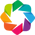

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name,Country)

In [15]:

import geopandas as gpd
import geoviews as gv
import holoviews as hv
from geoviews.tile_sources import CartoLight
from bokeh.models import HoverTool

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(hotel_df, geometry=gpd.points_from_xy(hotel_df['Lng'], hotel_df['Lat']))

# Define a function to create map visualizations
def create_map():
    hv.extension('bokeh')
    tiles = CartoLight()
    points = gv.Points(gdf, ['Lng', 'Lat'], ['City', 'Humidity', 'Hotel Name', 'Country']).opts(size='Humidity')
    hover = HoverTool(tooltips=[('City', '@City'), ('Country', '@Country'), ('Humidity', '@Humidity'), ('Hotel Name', '@{Hotel Name}')])
    return (tiles * points).opts(tools=[hover])

# Display the map
create_map().opts(width=800, height=500)
